<a href="https://colab.research.google.com/github/nallapaneni991001/Energy_Informatics/blob/my-new-branch/NALLAPANENI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading data set
import pandas as pd
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length{length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving energy_efficiency_data.csv to energy_efficiency_data.csv
User uploaded file "energy_efficiency_data.csv" with length34373 bytes


In [ ]:
# Reading dataset
dataset = pd.read_csv("/content/energy_efficiency_data.csv")

In [ ]:
# Visualising the data
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
# Define the columns to be scaled
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Scale the columns to a range of [0, 1]
dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])

In [ ]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dataset

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


array([[<Axes: title={'center': 'Relative_Compactness'}>,
        <Axes: title={'center': 'Surface_Area'}>,
        <Axes: title={'center': 'Wall_Area'}>],
       [<Axes: title={'center': 'Roof_Area'}>,
        <Axes: title={'center': 'Overall_Height'}>,
        <Axes: title={'center': 'Orientation'}>],
       [<Axes: title={'center': 'Glazing_Area'}>,
        <Axes: title={'center': 'Glazing_Area_Distribution'}>,
        <Axes: title={'center': 'Heating_Load'}>],
       [<Axes: title={'center': 'Cooling_Load'}>, <Axes: >, <Axes: >]],
      dtype=object)

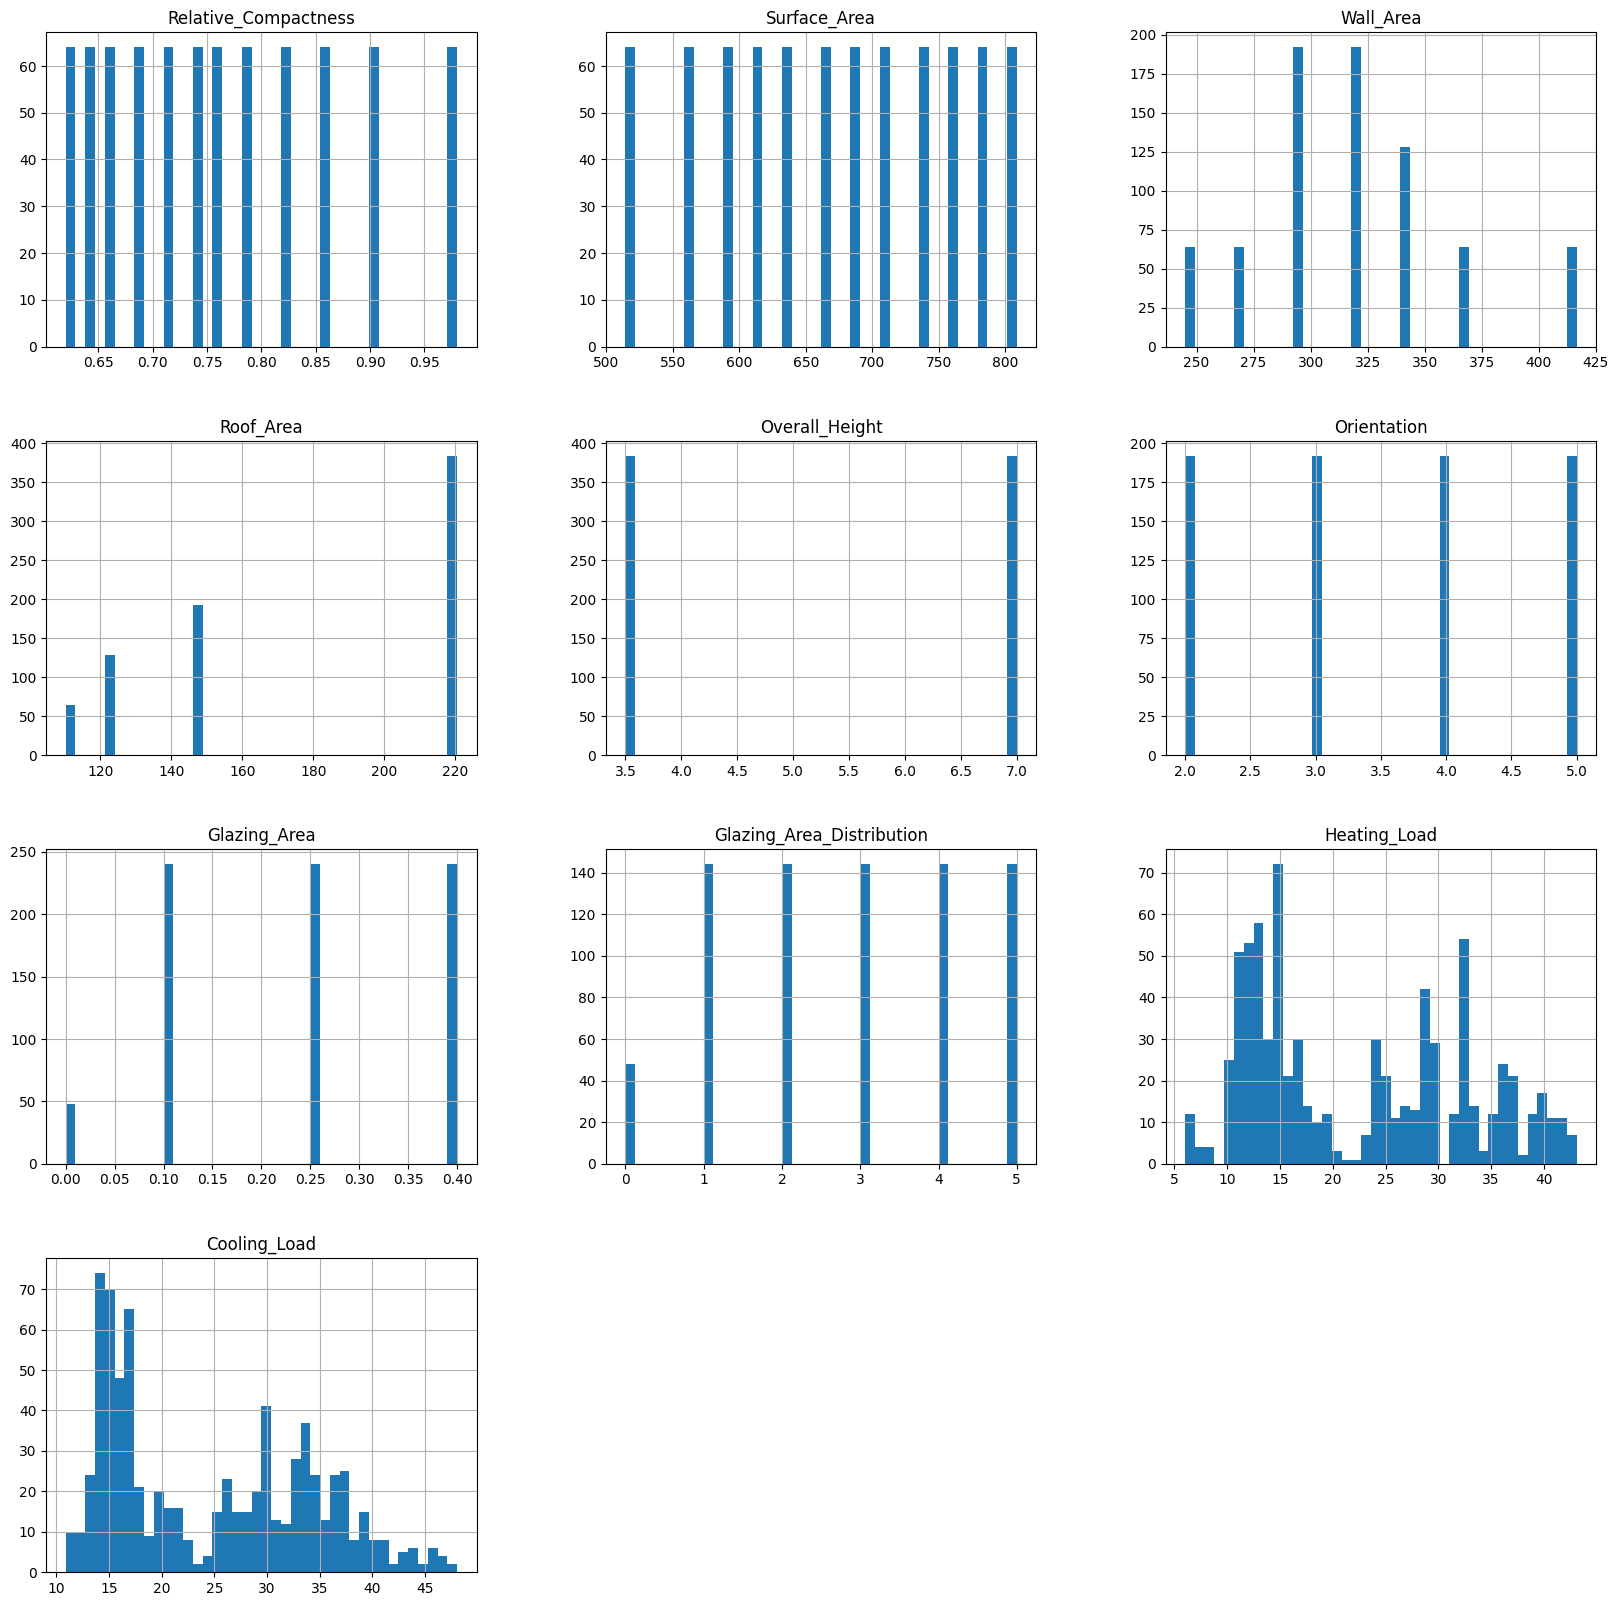

In [ ]:
# Visualising the dataset
dataset.hist(figsize=(20,20),bins=40)

<Axes: >

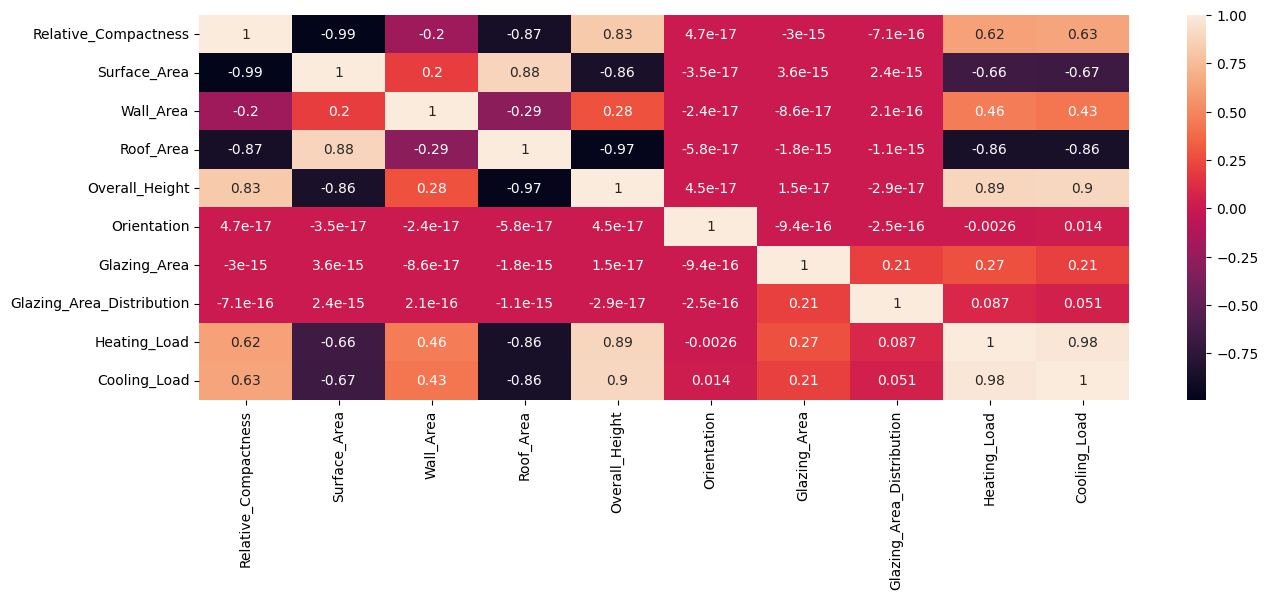

In [ ]:
# Plotting the correlation Heat Map
plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = dataset.drop(['Heating_Load'], axis=1)
y = dataset['Heating_Load']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Create instances of the three regression algorithms
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Train the models on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


# Make predictions on the test data
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


# Evaluate the performance of the models using three metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_lr = np.sqrt(mse_lr)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)


# Printing the evaluation metrics of each model
print('Linear Regression:')
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)
print('R2:', r2_lr)
print()

print('Decision Tree Regression:')
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)
print('R2:', r2_dt)
print()

print('Random Forest Regression:')
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print('R2:', r2_rf)
print()


Linear Regression:
MAE: 1.3035411892640691
MSE: 3.555740967874287
RMSE: 1.8856672473886498
R2: 0.9661712221272601

Decision Tree Regression:
MAE: 0.40640625000000014
MSE: 1.0087921875000003
RMSE: 1.004386473176536
R2: 0.9904025048115093

Random Forest Regression:
MAE: 0.37116458333333724
MSE: 0.5819243555208357
RMSE: 0.762839665670864
R2: 0.9944636603342284



Heating Load prediction using Random Forest:
MAE: 0.3355968749999987
MSE: 0.21855671958333014
RMSE: 0.4675005022278908
R2: 0.9979206846656776
Cooling Load prediction using Random Forest:
MAE: 1.0192067708333339
MSE: 2.843411877760413
RMSE: 1.686241939272183
R2: 0.9695452479142055


<ipython-input-48-9f87734797c3>:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_heat,hist=False);
<ipython-input-48-9f87734797c3>:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_cool,hist=False);


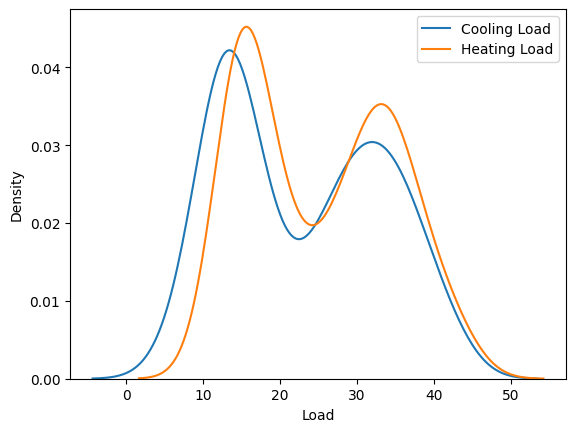

In [ ]:
# Splitting the dataset into training set and testing set
X = dataset.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heat = dataset['Heating_Load']
y_cool = dataset['Cooling_Load']
X_train, X_test, y_train_heat, y_test_heat, y_train_cool, y_test_cool = train_test_split(X, y_heat, y_cool, test_size=0.25, random_state=42)

# Training the Random Forest Regression model for the prediction of Heating Load
model_heat = RandomForestRegressor(n_estimators=100, random_state=42)
model_heat.fit(X_train, y_train_heat)

# determining the Heating Load for test set
y_pred_heat = model_heat.predict(X_test)

# building the model for Heating Load prediction
mae_heat = mean_absolute_error(y_test_heat, y_pred_heat)
mse_heat = mean_squared_error(y_test_heat, y_pred_heat)
rmse_heat = mean_squared_error(y_test_heat, y_pred_heat, squared=False)
r2_heat = r2_score(y_test_heat, y_pred_heat)

print("Heating Load prediction using Random Forest:")
print(f"MAE: {mae_heat}")
print(f"MSE: {mse_heat}")
print(f"RMSE: {rmse_heat}")
print(f"R2: {r2_heat}")

# Training the Random Forest Regression model for the prediction of Cooling Load
cool_model = RandomForestRegressor(n_estimators=100, random_state=42)
cool_model.fit(X_train, y_train_cool)

# determining the Cooling Load for test set
y_pred_cool = cool_model.predict(X_test)

# building the model for Cooling Load prediction
mae_cool = mean_absolute_error(y_test_cool, y_pred_cool)
mse_cool = mean_squared_error(y_test_cool, y_pred_cool)
rmse_cool = mean_squared_error(y_test_cool, y_pred_cool, squared=False)
r2_cool = r2_score(y_test_cool, y_pred_cool)

print("Cooling Load prediction using Random Forest:")
print(f"MAE: {mae_cool}")
print(f"MSE: {mse_cool}")
print(f"RMSE: {rmse_cool}")
print(f"R2: {r2_cool}")

sns.distplot(y_pred_heat,hist=False);
sns.distplot(y_pred_cool,hist=False);
plt.legend(['Cooling Load','Heating Load']);
plt.xlabel('Load');
plt.show();